In [2]:
# Description: This program uses Convolutional Neural Networks (CNN) 
#              to classify handwritten digits as numbers 0 - 9


!pip install tensorflow keras numpy matplotlib pandas

In [3]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [5]:
#Get the image shape
print(X_train.shape)#60000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)
print(X_test.shape)#10000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)


(60000, 28, 28)
(10000, 28, 28)


In [6]:
#Take a look at the first image (at index=0) in the training data set as a numpy array, This shows the image as a series of pixel values
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#Print the image label
y_test[0]

7

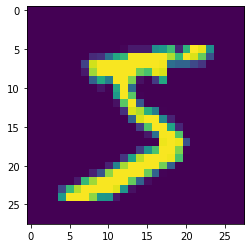

In [8]:
#Show the image as a picture
plt.imshow(X_train[0])

In [9]:
#Reshape the data to fit the model
x = X_train.reshape(60000, 28,28,1)
y1 = np.array(y_train)

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.optimizers import Adam, SGD
import math
import numpy
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
accu_lst = []
sen_lst=[]
pre_lst=[]
acc_lst=[]
mcc_lst=[]
auc_lst=[]

with tf.Session() as sess:

  
  for train, test in kfold.split(x, y1):


      x_test= X_test.reshape(10000, 28, 28, 1)

      y = to_categorical(y1)
      yy = to_categorical(y_test)
      #Build the CNN model
      model = Sequential()
      # add model layers
      model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
      model.add(Conv2D(32, kernel_size=3, activation='relu'))
      model.add(Flatten())
      model.add(Dense(10, activation='softmax'))

      #Compile the model
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

      model.fit(x[train], y[train], validation_split=0.10, epochs=3, verbose=0)

      # evaluate the model
      predictions = model.predict(x[test])
      y_pred=( np.argmax(predictions, axis=1))
      #confution matrix generation
      cm=np.array(confusion_matrix(y1[test],y_pred,labels=[0,1]))
      confusion=pd.DataFrame(cm,index=['not_Glutarylation','Glutarylation'],
                              columns=['predicted_not_Glutarylation','predicted_Glutarylation'])
      
      True_Positive=confusion.at['Glutarylation','predicted_Glutarylation']
      False_Positive=confusion.at['not_Glutarylation','predicted_Glutarylation']
      True_Negative=confusion.at['not_Glutarylation','predicted_not_Glutarylation']
      False_Negative=confusion.at['Glutarylation','predicted_not_Glutarylation']
      
      #Accuracy==>>accuracy = (correctly predicted class / total testing class) × 100%
      # accuracy_score(y_predict, y_test)

      total_testing_class=True_Positive+True_Negative+False_Positive+False_Negative
      correctly_predicted_class=True_Positive + True_Negative
      accuracy = (correctly_predicted_class / total_testing_class) * 100
      
      # Precision = TP / TP + FP
      precision = (True_Positive / (True_Positive + False_Positive))*100
      
      # Sensitivity = TP / TP + FN
      sensitivity = (True_Positive / (True_Positive + False_Negative))*100

      #ACC=TP+TN / TP+FP+TN+FN
      acc = (True_Positive + True_Negative) /(True_Positive+True_Negative+False_Positive+False_Negative) *100
      #MCC = TP*TN - FN*FP / sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN))
      mcc = ((True_Positive * True_Negative) - (False_Positive * False_Negative)) / math.sqrt((True_Positive + False_Negative) * (True_Negative + False_Positive)*(True_Positive + False_Positive)*(True_Negative + False_Negative)) *100
      
      # AUC score
      lr_probs = model.predict_proba(x[test])
      # lr_probs = lr_probs[:, 1]
      lr_auc = (roc_auc_score(y1[test], lr_probs, multi_class="ovr",average="macro"))*100


      print(" Accuracy :%.2f%%   Precision :%.2f%%   Sensitivity :%.2f%%      MCC :%.2f%%   AUC :%.2f%%"% (accuracy,precision,sensitivity,mcc,lr_auc))
      accu_lst.append(accuracy)
      sen_lst.append(sensitivity)
      pre_lst.append(precision)
      acc_lst.append(acc)
      mcc_lst.append(mcc)
      auc_lst.append(lr_auc)
  print ('10 Fold cross-validation performance measurement :')
  print("Accuracy    :%.2f%% (+/- %.2f%%)" % (numpy.mean(accu_lst), numpy.std(accu_lst)))
  print("Precision   :%.2f%% (+/- %.2f%%)" % (numpy.mean(pre_lst), numpy.std(pre_lst)))
  print("Sensitivity :%.2f%% (+/- %.2f%%)" % (numpy.mean(sen_lst), numpy.std(sen_lst)))
  print("MCC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(mcc_lst), numpy.std(mcc_lst)))
  print("AUC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(auc_lst), numpy.std(auc_lst)))
  
  
  
  #independent_test

      
  test_prediction = model.predict(x_test)
  yy_pred=( np.argmax(test_prediction,axis=1))

  results = confusion_matrix(y_test,yy_pred) 
  print ('Test set performance measurement :')
  print ('Confusion Matrix :')
  print(results) 
  print ('Accuracy Score :',accuracy_score(y_test,yy_pred))
  print ('Report : ')
  print (classification_report(y_test,yy_pred))

  test_lr_probs = model.predict_proba(x_test)
  test_lr_auc = (roc_auc_score(y_test, test_lr_probs, multi_class="ovr",average="macro"))*100
  print("AUC :%.2f%%"%(test_lr_auc))






Instructions for updating:
If using Keras pass *_constraint arguments to layers.
 Accuracy :100.00%   Precision :100.00%   Sensitivity :100.00%      MCC :100.00%   AUC :99.93%
 Accuracy :99.92%   Precision :99.92%   Sensitivity :99.92%      MCC :99.84%   AUC :99.92%
 Accuracy :99.92%   Precision :99.92%   Sensitivity :99.92%      MCC :99.84%   AUC :99.92%
 Accuracy :99.96%   Precision :100.00%   Sensitivity :99.92%      MCC :99.92%   AUC :99.91%
 Accuracy :100.00%   Precision :100.00%   Sensitivity :100.00%      MCC :100.00%   AUC :99.93%
10 Fold cross-validation performance measurement :
Accuracy    :99.96% (+/- 0.04%)
Precision   :99.97% (+/- 0.04%)
Sensitivity :99.95% (+/- 0.04%)
MCC         :99.92% (+/- 0.07%)
AUC         :99.92% (+/- 0.01%)
Test set performance measurement :
Confusion Matrix :
[[ 972    0    4    0    0    0    3    0    1    0]
 [   0 1123    5    1    2    0    3    1    0    0]
 [   1    7 1014    1    0    0    1    7    1    0]
 [   0    0    6  993    0    8